In [82]:
import numpy as np
import pandas as pd

In [83]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [84]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3503,ham,Will you be here for food,NaN,NaN,NaN
920,ham,When u wana see it then,NaN,NaN,NaN
3534,ham,I'm at home. Please call,NaN,NaN,NaN
2893,ham,K...k...yesterday i was in cbe .,NaN,NaN,NaN
5440,ham,Thank you. do you generally date the brothas?,NaN,NaN,NaN


In [85]:
df.shape

(5572, 5)

In [86]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [88]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [89]:
df.sample(5)

,v1,v2
975,ham,Hey no I ad a crap nite was borin without ya 2...
1489,ham,Ok i juz receive..
411,ham,Cos i want it to be your thing
4486,ham,Miss call miss call khelate kintu opponenter m...
1945,ham,Can Ì_ call me at 10:10 to make sure dat i've ...


In [90]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
649,spam,"You have won ?1,000 cash or a ?2,000 prize! To..."
1951,ham,Haha... Really oh no... How? Then will they de...
2571,ham,Û_ and donÛ÷t worry weÛ÷ll have finished by...
5330,ham,Dude im no longer a pisces. Im an aquarius now.
5136,ham,There are some nice pubs near here or there is...


In [91]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [92]:
df['target'] = encoder.fit_transform(df['target'])

In [93]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [94]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [95]:
# check for duplicate values
df.duplicated().sum()

403

In [96]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [97]:
df.duplicated().sum()

0

In [98]:
df.shape

(5169, 2)

## 2.EDA

In [99]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [100]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

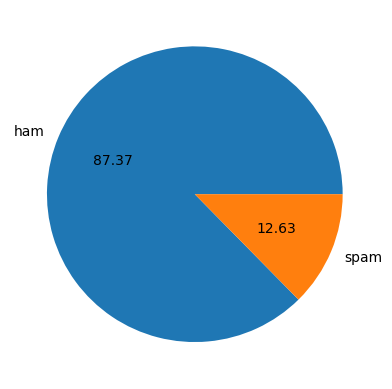

In [101]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [102]:
# Data is imbalanced

In [103]:
import nltk

In [104]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Ashish
[nltk_data]     kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [105]:
df['num_characters'] = df['text'].apply(len)

In [106]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [107]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [108]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [109]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [110]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [111]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [112]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [113]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [114]:
import seaborn as sns

C:\Users\Ashish kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ashish kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

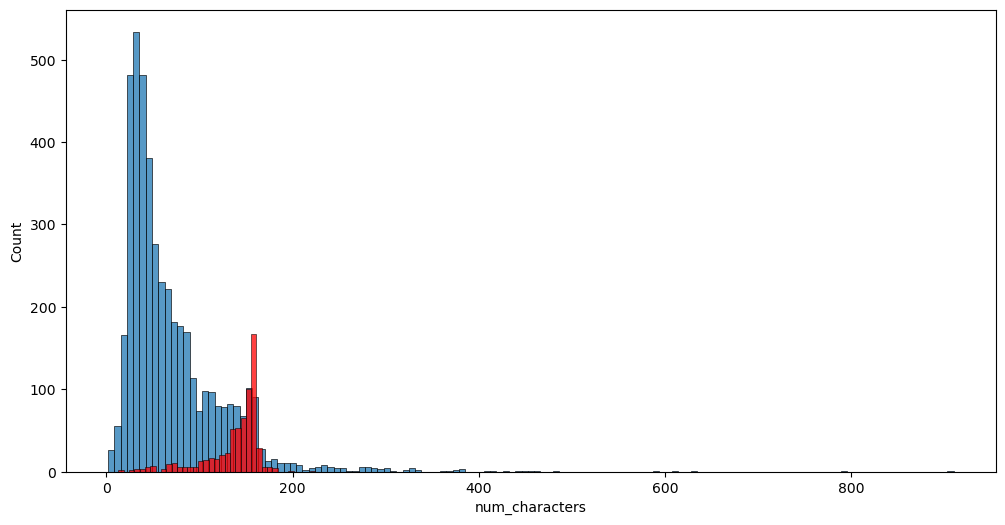

In [115]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

C:\Users\Ashish kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ashish kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

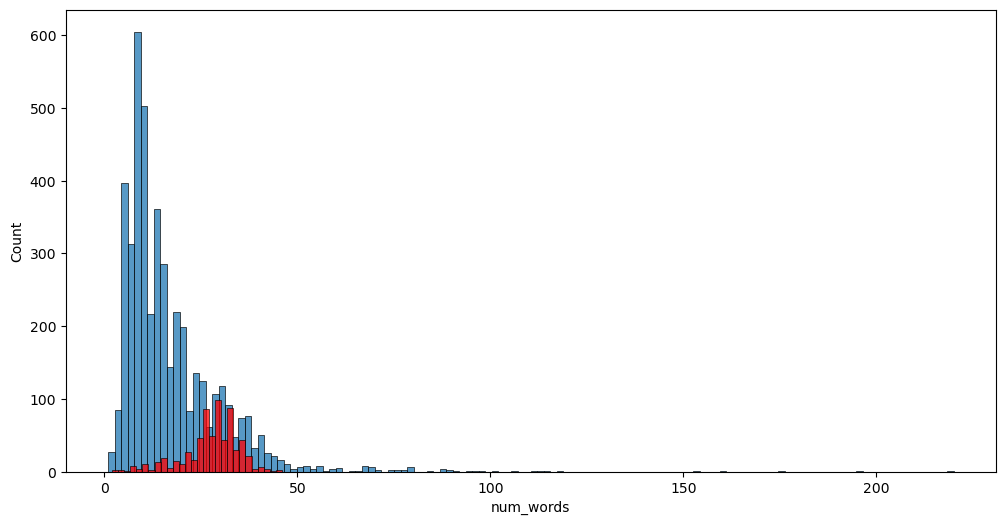

In [116]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

C:\Users\Ashish kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ashish kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ashish kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


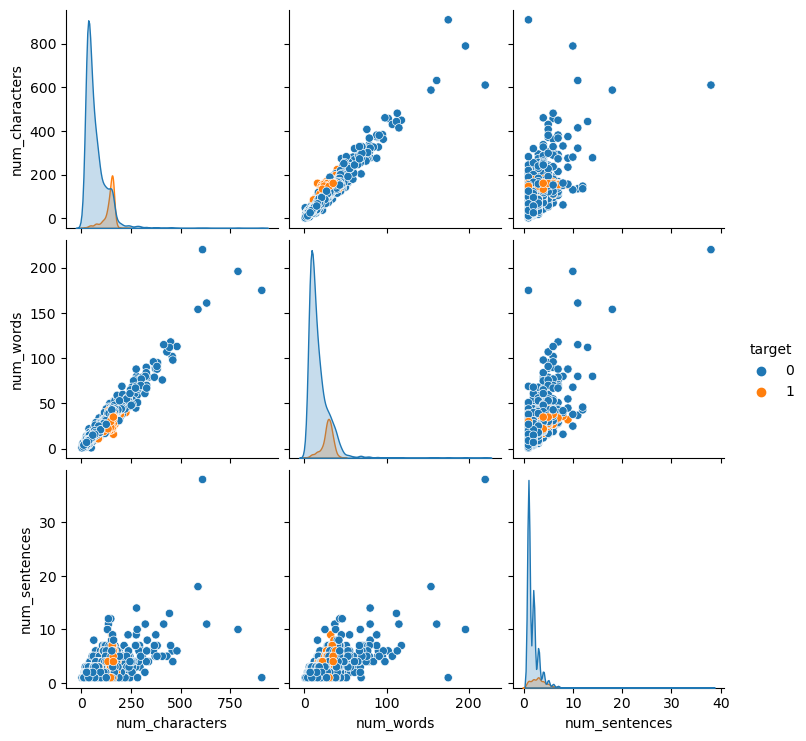

In [117]:
sns.pairplot(df,hue='target')

<Axes: >

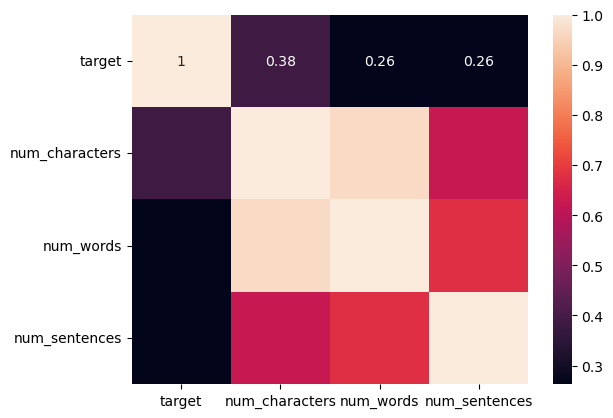

In [118]:
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True)

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [119]:
import string
from nltk.corpus import stopwords

def transform_text(text):
    y = []
    text = text.lower().split()
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    return ' '.join(text)

transformed_text = transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")
print(transformed_text)


i'm gonna home soon want talk stuff anymore tonight, k? i've cried enough today.


In [120]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [121]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [122]:
df['transformed_text'] = df['text'].apply(transform_text)

In [123]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"go jurong point, crazy.. available bugis n gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar... joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor... u c already say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"nah think goes usf, lives around though"


In [124]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [125]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

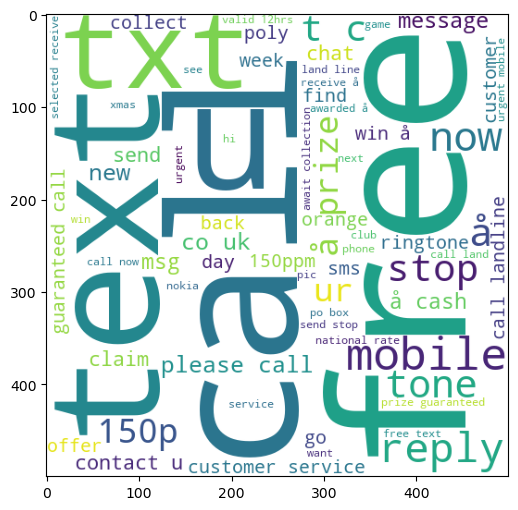

In [126]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [127]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

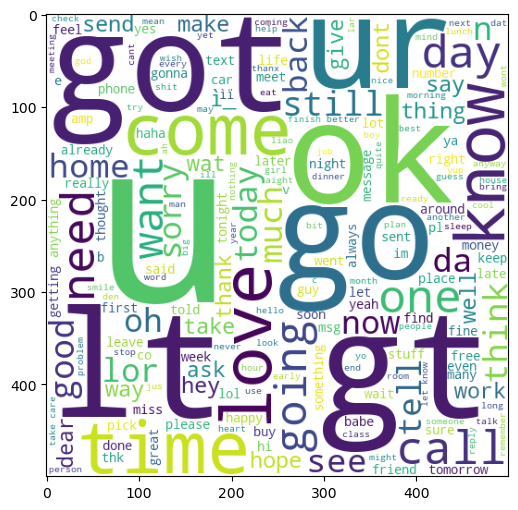

In [128]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [129]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"go jurong point, crazy.. available bugis n gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar... joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor... u c already say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"nah think goes usf, lives around though"


In [130]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [131]:
len(spam_corpus)

11075

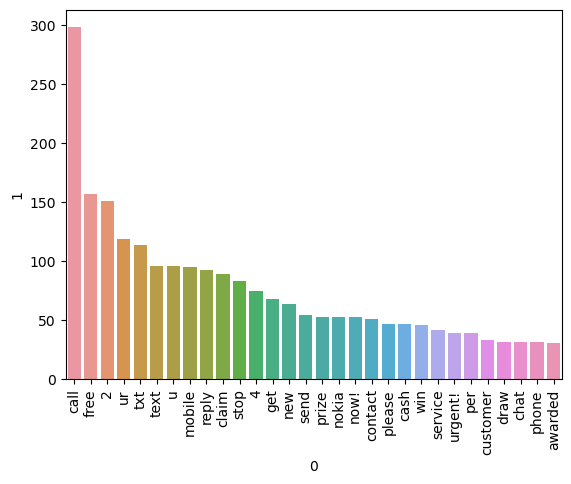

In [135]:
from collections import Counter

# Create a DataFrame from the Counter object
counter_df = pd.DataFrame(Counter(spam_corpus).most_common(30))

# Plot using a single DataFrame
sns.barplot(data=counter_df, x=0, y=1)

# Rotate x-axis labels vertically
plt.xticks(rotation='vertical')

# Display the plot
plt.show()


In [136]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [137]:
len(ham_corpus)

38351

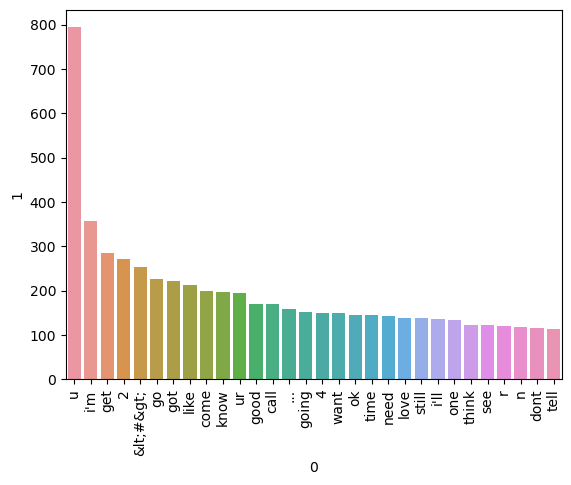

In [139]:
from collections import Counter

# Create a DataFrame from the Counter object
counter_df = pd.DataFrame(Counter(ham_corpus).most_common(30))

# Plot using a single DataFrame
sns.barplot(data=counter_df, x=0, y=1)

# Rotate x-axis labels vertically
plt.xticks(rotation='vertical')

# Display the plot
plt.show()


In [140]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"go jurong point, crazy.. available bugis n gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar... joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor... u c already say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"nah think goes usf, lives around though"


## 4. Model Building

In [141]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [142]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [143]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [144]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [145]:
X.shape

(5169, 3000)

In [146]:
y = df['target'].values

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [149]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [150]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [151]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8965183752417795
[[809  87]
 [ 20 118]]
0.5756097560975609


In [152]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9796905222437138
[[896   0]
 [ 21 117]]
1.0


In [153]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9874274661508704
[[896   0]
 [ 13 125]]
1.0


In [154]:
# tfidf --> MNB

In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [156]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [157]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [158]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [159]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9787234042553191, 0.9754098360655737)

In [160]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9787234042553191
Precision -  0.9754098360655737
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9796905222437138
Precision -  1.0
For  DT
Accuracy -  0.941972920696325
Precision -  0.875
For  LR
Accuracy -  0.9545454545454546
Precision -  0.9504950495049505
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9912280701754386
For  AdaBoost
Accuracy -  0.9758220502901354
Precision -  0.9669421487603306
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8671875
For  ETC
Accuracy -  0.9816247582205029
Precision -  0.983739837398374
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9223300970873787
For  xgb
Accuracy -  0.97678916827853
Precision -  0.9596774193548387


In [161]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [162]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.979691,1.000000
5,RF,0.974855,0.991228
8,ETC,0.981625,0.983740
0,SVC,0.978723,0.975410
6,AdaBoost,0.975822,0.966942
10,xgb,0.976789,0.959677
4,LR,0.954545,0.950495
9,GBDT,0.950677,0.922330
3,DT,0.941973,0.875000


In [163]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [164]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.979691
2,RF,Accuracy,0.974855
3,ETC,Accuracy,0.981625
4,SVC,Accuracy,0.978723
5,AdaBoost,Accuracy,0.975822
6,xgb,Accuracy,0.976789
7,LR,Accuracy,0.954545
8,GBDT,Accuracy,0.950677
9,DT,Accuracy,0.941973


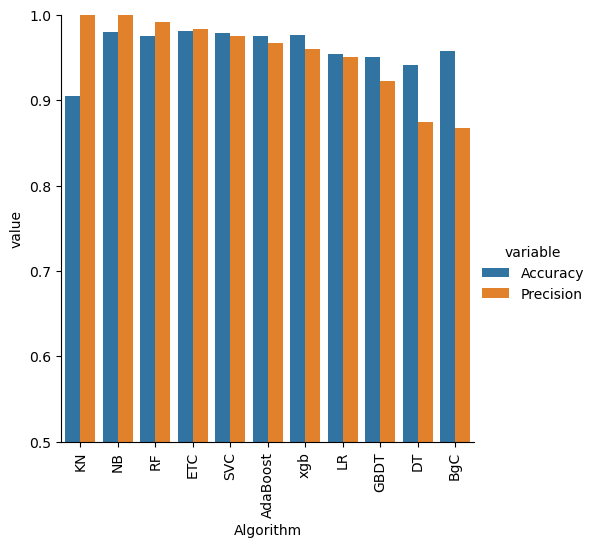

In [165]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [166]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [167]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [168]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [169]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [170]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [171]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [172]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.979691,1.000000,0.979691,1.000000,0.979691,1.000000,0.979691,1.000000
2,RF,0.974855,0.991228,0.974855,0.991228,0.974855,0.991228,0.974855,0.991228
3,ETC,0.981625,0.983740,0.981625,0.983740,0.981625,0.983740,0.981625,0.983740
4,SVC,0.978723,0.975410,0.978723,0.975410,0.978723,0.975410,0.978723,0.975410
5,AdaBoost,0.975822,0.966942,0.975822,0.966942,0.975822,0.966942,0.975822,0.966942
6,xgb,0.976789,0.959677,0.976789,0.959677,0.976789,0.959677,0.976789,0.959677
7,LR,0.954545,0.950495,0.954545,0.950495,0.954545,0.950495,0.954545,0.950495
8,GBDT,0.950677,0.922330,0.950677,0.922330,0.950677,0.922330,0.950677,0.922330
9,DT,0.941973,0.875000,0.941973,0.875000,0.941973,0.875000,0.941973,0.875000


In [173]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [174]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [175]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [176]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9845261121856866
Precision 0.9841269841269841


In [177]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [178]:
from sklearn.ensemble import StackingClassifier

In [179]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))